In [15]:
from datetime import datetime
import matplotlib.pyplot as pyplot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# 定数
TEST_SIZE = 0.2
RANDOM_STATE = 123
MIN_SAMPLES_LEAF = 10

% matplotlib inline

In [18]:
# レース結果のCSVファイルを取り込む(約3年分)
import_df = pd.read_csv('taraining_data_15-17_new.csv')

In [31]:
# 学習・テストデータの作成
training_df = pd.DataFrame()

# 目的変数の設定
training_df['STD_DEV'] = import_df['STD_DEV']

# 説明変数の設定
# training_df['RACE_ID'] = import_df['RACE_ID']
training_df['RACE_DATE'] = import_df['RACE_DATE'].apply(lambda s: datetime.strptime(s, "%Y/%m/%d").timestamp())
training_df['RACE_COURSE'] = import_df['RACE_COURSE']
training_df['COURSE'] = import_df['COURSE']
# training_df['WEATHER'] = import_df['WEATHER']
# training_df['TRACK'] = import_df['TRACK']
training_df['DISTANCE'] = import_df['DISTANCE']
training_df['PRIZE1'] = import_df['PRIZE1']
# training_df['HORSE_NAME'] = import_df['HORSE_NAME']
training_df['FRAME'] = import_df['FRAME']
training_df['NUM'] = import_df['NUM']
training_df['GENDER'] = import_df['GENDER']
training_df['AGE'] = import_df['AGE']
training_df['CNT'] = import_df['CNT']
training_df['RANK_1'] = import_df['RANK_1']
training_df['RANK_2'] = import_df['RANK_2']
training_df['RANK_3'] = import_df['RANK_3']
training_df['RANK_4'] = import_df['RANK_4']
training_df['RANK_5'] = import_df['RANK_5']
training_df['AVG_STD_DEV'] = import_df['AVG_STD_DEV']
training_df['RACE_COURSE_CNT'] = import_df['RACE_COURSE_CNT']
training_df['RACE_COURSE_RANK_1'] = import_df['RACE_COURSE_RANK_1']
training_df['RACE_COURSE_RANK_2'] = import_df['RACE_COURSE_RANK_2']
training_df['RACE_COURSE_RANK_3'] = import_df['RACE_COURSE_RANK_3']
training_df['RACE_COURSE_RANK_4'] = import_df['RACE_COURSE_RANK_4']
training_df['RACE_COURSE_RANK_5'] = import_df['RACE_COURSE_RANK_5']
training_df['RACE_COURSE_AVG_STD_DEV'] = import_df['RACE_COURSE_AVG_STD_DEV']
training_df['COURSE_CNT'] = import_df['COURSE_CNT']
training_df['COURSE_RANK_1'] = import_df['COURSE_RANK_1']
training_df['COURSE_RANK_2'] = import_df['COURSE_RANK_2']
training_df['COURSE_RANK_3'] = import_df['COURSE_RANK_3']
training_df['COURSE_RANK_4'] = import_df['COURSE_RANK_4']
training_df['COURSE_RANK_5'] = import_df['COURSE_RANK_5']
training_df['COURSE_AVG_STD_DEV'] = import_df['COURSE_AVG_STD_DEV']
training_df['DISTANCE_CNT'] = import_df['DISTANCE_CNT']
training_df['DISTANCE_RANK_1'] = import_df['DISTANCE_RANK_1']
training_df['DISTANCE_RANK_2'] = import_df['DISTANCE_RANK_2']
training_df['DISTANCE_RANK_3'] = import_df['DISTANCE_RANK_3']
training_df['DISTANCE_RANK_4'] = import_df['DISTANCE_RANK_4']
training_df['DISTANCE_RANK_5'] = import_df['DISTANCE_RANK_5']
training_df['DISTANCE_AVG_STD_DEV'] = import_df['DISTANCE_AVG_STD_DEV']

# トレーニング設定
# 説明変数の範囲を設定
feature = training_df.ix[:, 'RACE_DATE':]
# 目的変数を設定
correct = training_df['STD_DEV']

# 学習データとテストデータの分離
training_feature, test_feature, traininig_correct, test_correct = train_test_split(
    feature, correct, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# ランダムフォレストの作成
rfc = RandomForestRegressor(min_samples_leaf=MIN_SAMPLES_LEAF, random_state=RANDOM_STATE)
rfc.fit(training_feature, traininig_correct)

# 評価
total_cnt = len(training_feature) + len(test_feature)
print('学習: {}件 ({:.2%})'.format(len(training_feature), len(training_feature) / total_cnt))
print('テスト: {}件 ({:.2%})'.format(len(test_feature), len(test_feature) / total_cnt))
print('\n')
print('学習スコア: {:.2%}'.format(rfc.score(training_feature, traininig_correct)))
print('テストスコア: {:.2%}'.format(rfc.score(test_feature, test_correct)))
print('\n')
# 予測値を計算
y_train_pred = rfc.predict(training_feature)
y_test_pred = rfc.predict(test_feature)
# 平均二乗誤差（MSEの計算
print('MSE train : %.3f, test : %.3f'
      % (mean_squared_error(traininig_correct, y_train_pred), mean_squared_error(test_correct, y_test_pred)))
# R^2の計算
print('R2 train : %.3f, test : %.3f'
      % (r2_score(traininig_correct, y_train_pred), r2_score(test_correct, y_test_pred)))

学習: 112220件 (80.00%)
テスト: 28055件 (20.00%)


学習スコア: 64.62%
テストスコア: 49.71%


MSE train : 35.477, test : 49.214
R2 train : 0.646, test : 0.497


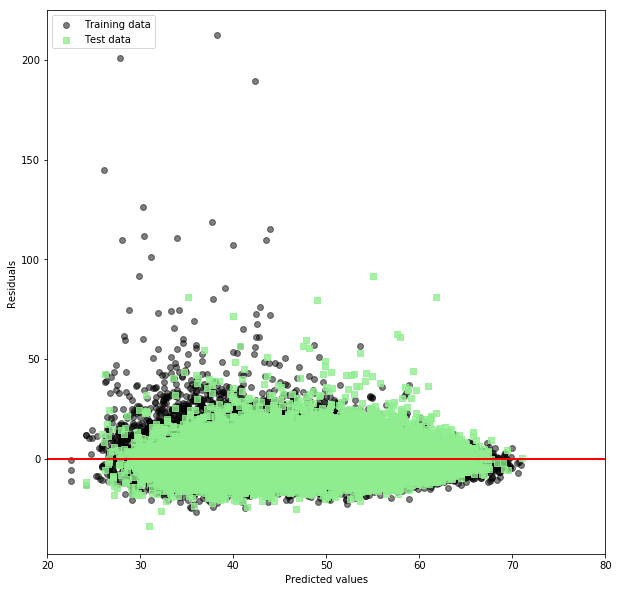

In [12]:
# 残差を可視化
pyplot.figure(figsize = (10, 10))
pyplot.scatter(y_train_pred, y_train_pred - traininig_correct, c = 'black', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
pyplot.scatter(y_test_pred, y_test_pred - test_correct, c = 'lightgreen', marker = 's', s = 35, alpha = 0.8, label = 'Test data')
pyplot.xlabel('Predicted values')
pyplot.ylabel('Residuals')
pyplot.legend(loc = 'upper left')
pyplot.hlines(y = 0, xmin = 20, xmax = 80, lw = 2, color = 'red')
pyplot.xlim([20, 80])
pyplot.show()

([<matplotlib.axis.YTick at 0x1ad0f8d0>,
 <a list of 37 Text yticklabel objects>)

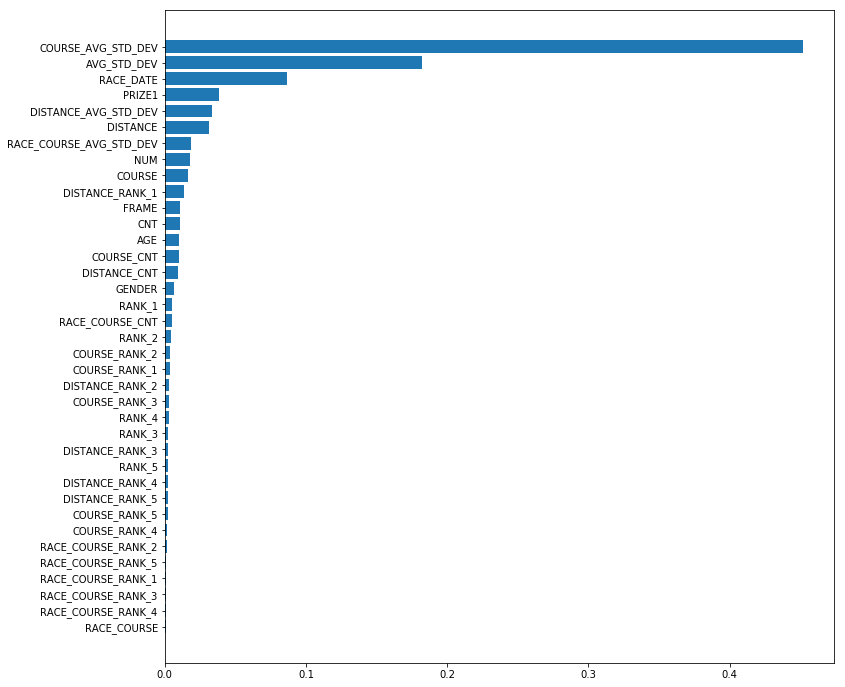

In [20]:
# 作成したモデルの相関度が高い項目を表示
values, names = zip(*sorted(zip(rfc.feature_importances_, feature.columns)))

pyplot.figure(figsize=(12, 12))
pyplot.barh(range(len(names)), values, align='center')
pyplot.yticks(range(len(names)), names)

In [32]:
# レースファイルの取りこみ
import_prediction_df = pd.read_csv('yosou_201711_new.csv')

# 予想データの作成
prediction_df = pd.DataFrame()

# 説明変数の設定
prediction_df['RACE_ID'] = import_prediction_df['RACE_ID']
prediction_df['RACE_DATE'] = import_prediction_df['RACE_DATE'].apply(lambda s: datetime.strptime(s, "%Y/%m/%d").timestamp())
prediction_df['RACE_COURSE'] = import_prediction_df['RACE_COURSE']
prediction_df['COURSE'] = import_prediction_df['COURSE']
# prediction_df['WEATHER'] = import_prediction_df['WEATHER']
# prediction_df['TRACK'] = import_prediction_df['TRACK']
prediction_df['DISTANCE'] = import_prediction_df['DISTANCE']
prediction_df['PRIZE1'] = import_prediction_df['PRIZE1']
# prediction_df['HORSE_NAME'] = import_prediction_df['HORSE_NAME']
prediction_df['FRAME'] = import_prediction_df['FRAME']
prediction_df['NUM'] = import_prediction_df['NUM']
prediction_df['GENDER'] = import_prediction_df['GENDER']
prediction_df['AGE'] = import_prediction_df['AGE']
prediction_df['CNT'] = import_prediction_df['CNT']
prediction_df['RANK_1'] = import_prediction_df['RANK_1']
prediction_df['RANK_2'] = import_prediction_df['RANK_2']
prediction_df['RANK_3'] = import_prediction_df['RANK_3']
prediction_df['RANK_4'] = import_prediction_df['RANK_4']
prediction_df['RANK_5'] = import_prediction_df['RANK_5']
prediction_df['AVG_STD_DEV'] = import_prediction_df['AVG_STD_DEV']
prediction_df['RACE_COURSE_CNT'] = import_prediction_df['RACE_COURSE_CNT']
prediction_df['RACE_COURSE_RANK_1'] = import_prediction_df['RACE_COURSE_RANK_1']
prediction_df['RACE_COURSE_RANK_2'] = import_prediction_df['RACE_COURSE_RANK_2']
prediction_df['RACE_COURSE_RANK_3'] = import_prediction_df['RACE_COURSE_RANK_3']
prediction_df['RACE_COURSE_RANK_4'] = import_prediction_df['RACE_COURSE_RANK_4']
prediction_df['RACE_COURSE_RANK_5'] = import_prediction_df['RACE_COURSE_RANK_5']
prediction_df['RACE_COURSE_AVG_STD_DEV'] = import_prediction_df['RACE_COURSE_AVG_STD_DEV']
prediction_df['COURSE_CNT'] = import_prediction_df['COURSE_CNT']
prediction_df['COURSE_RANK_1'] = import_prediction_df['COURSE_RANK_1']
prediction_df['COURSE_RANK_2'] = import_prediction_df['COURSE_RANK_2']
prediction_df['COURSE_RANK_3'] = import_prediction_df['COURSE_RANK_3']
prediction_df['COURSE_RANK_4'] = import_prediction_df['COURSE_RANK_4']
prediction_df['COURSE_RANK_5'] = import_prediction_df['COURSE_RANK_5']
prediction_df['COURSE_AVG_STD_DEV'] = import_prediction_df['COURSE_AVG_STD_DEV']
prediction_df['DISTANCE_CNT'] = import_prediction_df['DISTANCE_CNT']
prediction_df['DISTANCE_RANK_1'] = import_prediction_df['DISTANCE_RANK_1']
prediction_df['DISTANCE_RANK_2'] = import_prediction_df['DISTANCE_RANK_2']
prediction_df['DISTANCE_RANK_3'] = import_prediction_df['DISTANCE_RANK_3']
prediction_df['DISTANCE_RANK_4'] = import_prediction_df['DISTANCE_RANK_4']
prediction_df['DISTANCE_RANK_5'] = import_prediction_df['DISTANCE_RANK_5']
prediction_df['DISTANCE_AVG_STD_DEV'] = import_prediction_df['DISTANCE_AVG_STD_DEV']

prediction_pred = rfc.predict(prediction_df.ix[:, 'RACE_DATE':])

In [33]:
result_feature = prediction_df.copy()
result_feature['HORSE_NAME'] = pd.Series(import_prediction_df['HORSE_NAME'], index=result_feature.index)
result_feature['STD_DEV'] = pd.Series(import_prediction_df['STD_DEV'], index=result_feature.index)
result_feature['RANK'] = pd.Series(import_prediction_df['RANK'], index=result_feature.index)
result_feature['POPULARITY'] = pd.Series(import_prediction_df['POPULARITY'], index=result_feature.index)
result_feature['ODDS'] = pd.Series(import_prediction_df['ODDS'], index=result_feature.index)
result_feature['result'] = pd.Series(prediction_pred, index=result_feature.index)
result_feature['result_rank'] = result_feature.groupby('RACE_ID')['result'].rank(ascending=False, method='min')
result_feature = result_feature.sort_values(by=["RACE_ID", "result_rank"], ascending=True)
result_feature[result_feature['result_rank'] == 1].to_csv("201711_result1_new.csv")
# for result in result_feature[result_feature['result_rank'] == 1]:

In [47]:
# 学習・テストデータの作成
training_df = pd.DataFrame()

# 目的変数の設定
training_df['STD_DEV'] = import_df['STD_DEV']

# 説明変数の設定
# training_df['RACE_ID'] = import_df['RACE_ID']
# training_df['RACE_DATE'] = import_df['RACE_DATE'].apply(lambda s: datetime.strptime(s, "%Y/%m/%d").timestamp())
training_df['RACE_COURSE'] = import_df['RACE_COURSE']
training_df['COURSE'] = import_df['COURSE']
# training_df['WEATHER'] = import_df['WEATHER']
# training_df['TRACK'] = import_df['TRACK']
training_df['DISTANCE'] = import_df['DISTANCE']
training_df['PRIZE1'] = import_df['PRIZE1']
# training_df['HORSE_NAME'] = import_df['HORSE_NAME']
training_df['FRAME'] = import_df['FRAME']
training_df['NUM'] = import_df['NUM']
training_df['GENDER'] = import_df['GENDER']
training_df['AGE'] = import_df['AGE']
training_df['CNT'] = import_df['CNT']
training_df['RANK_1'] = import_df['RANK_1']
training_df['RANK_2'] = import_df['RANK_2']
training_df['RANK_3'] = import_df['RANK_3']
# training_df['RANK_4'] = import_df['RANK_4']
# training_df['RANK_5'] = import_df['RANK_5']
training_df['AVG_STD_DEV'] = import_df['AVG_STD_DEV']
training_df['RACE_COURSE_CNT'] = import_df['RACE_COURSE_CNT']
training_df['RACE_COURSE_RANK_1'] = import_df['RACE_COURSE_RANK_1']
training_df['RACE_COURSE_RANK_2'] = import_df['RACE_COURSE_RANK_2']
training_df['RACE_COURSE_RANK_3'] = import_df['RACE_COURSE_RANK_3']
# training_df['RACE_COURSE_RANK_4'] = import_df['RACE_COURSE_RANK_4']
# training_df['RACE_COURSE_RANK_5'] = import_df['RACE_COURSE_RANK_5']
training_df['RACE_COURSE_AVG_STD_DEV'] = import_df['RACE_COURSE_AVG_STD_DEV']
training_df['COURSE_CNT'] = import_df['COURSE_CNT']
training_df['COURSE_RANK_1'] = import_df['COURSE_RANK_1']
training_df['COURSE_RANK_2'] = import_df['COURSE_RANK_2']
training_df['COURSE_RANK_3'] = import_df['COURSE_RANK_3']
# training_df['COURSE_RANK_4'] = import_df['COURSE_RANK_4']
# training_df['COURSE_RANK_5'] = import_df['COURSE_RANK_5']
training_df['COURSE_AVG_STD_DEV'] = import_df['COURSE_AVG_STD_DEV']
training_df['DISTANCE_CNT'] = import_df['DISTANCE_CNT']
training_df['DISTANCE_RANK_1'] = import_df['DISTANCE_RANK_1']
training_df['DISTANCE_RANK_2'] = import_df['DISTANCE_RANK_2']
training_df['DISTANCE_RANK_3'] = import_df['DISTANCE_RANK_3']
# training_df['DISTANCE_RANK_4'] = import_df['DISTANCE_RANK_4']
# training_df['DISTANCE_RANK_5'] = import_df['DISTANCE_RANK_5']
training_df['DISTANCE_AVG_STD_DEV'] = import_df['DISTANCE_AVG_STD_DEV']

# トレーニング設定
# 説明変数の範囲を設定
feature = training_df.ix[:, 'RACE_COURSE':]
# 目的変数を設定
correct = training_df['STD_DEV']

# 学習データとテストデータの分離
training_feature, test_feature, traininig_correct, test_correct = train_test_split(
    feature, correct, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# ランダムフォレストの作成
rfc = RandomForestRegressor(min_samples_leaf=3, random_state=RANDOM_STATE)
rfc.fit(training_feature, traininig_correct)

# 評価
total_cnt = len(training_feature) + len(test_feature)
print('学習: {}件 ({:.2%})'.format(len(training_feature), len(training_feature) / total_cnt))
print('テスト: {}件 ({:.2%})'.format(len(test_feature), len(test_feature) / total_cnt))
print('\n')
print('学習スコア: {:.2%}'.format(rfc.score(training_feature, traininig_correct)))
print('テストスコア: {:.2%}'.format(rfc.score(test_feature, test_correct)))
print('\n')
# 予測値を計算
y_train_pred = rfc.predict(training_feature)
y_test_pred = rfc.predict(test_feature)
# 平均二乗誤差（MSEの計算
print('MSE train : %.3f, test : %.3f'
      % (mean_squared_error(traininig_correct, y_train_pred), mean_squared_error(test_correct, y_test_pred)))
# R^2の計算
print('R2 train : %.3f, test : %.3f'
      % (r2_score(traininig_correct, y_train_pred), r2_score(test_correct, y_test_pred)))

学習: 112220件 (80.00%)
テスト: 28055件 (20.00%)


学習スコア: 76.21%
テストスコア: 42.18%


MSE train : 23.858, test : 56.581
R2 train : 0.762, test : 0.422


([<matplotlib.axis.YTick at 0x145e4860>,
 <a list of 28 Text yticklabel objects>)

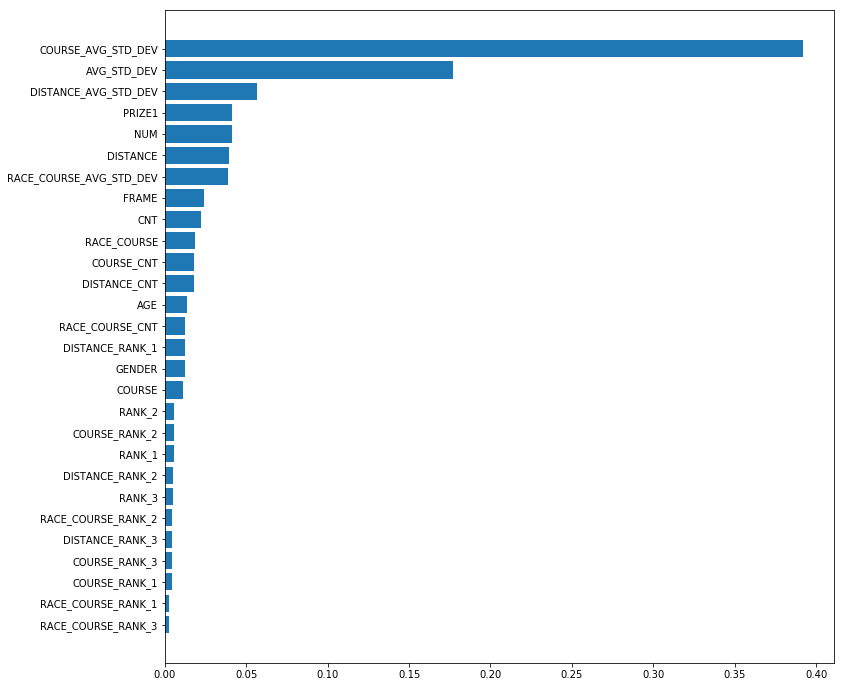

In [48]:
# 作成したモデルの相関度が高い項目を表示
values, names = zip(*sorted(zip(rfc.feature_importances_, feature.columns)))

pyplot.figure(figsize=(12, 12))
pyplot.barh(range(len(names)), values, align='center')
pyplot.yticks(range(len(names)), names)

In [43]:
# レースファイルの取りこみ
import_prediction_df = pd.read_csv('yosou_201711_new.csv')

# 予想データの作成
prediction_df = pd.DataFrame()

# 説明変数の設定
prediction_df['RACE_ID'] = import_prediction_df['RACE_ID']
# prediction_df['RACE_DATE'] = import_prediction_df['RACE_DATE'].apply(lambda s: datetime.strptime(s, "%Y/%m/%d").timestamp())
prediction_df['RACE_COURSE'] = import_prediction_df['RACE_COURSE']
prediction_df['COURSE'] = import_prediction_df['COURSE']
# prediction_df['WEATHER'] = import_prediction_df['WEATHER']
# prediction_df['TRACK'] = import_prediction_df['TRACK']
prediction_df['DISTANCE'] = import_prediction_df['DISTANCE']
prediction_df['PRIZE1'] = import_prediction_df['PRIZE1']
# prediction_df['HORSE_NAME'] = import_prediction_df['HORSE_NAME']
prediction_df['FRAME'] = import_prediction_df['FRAME']
prediction_df['NUM'] = import_prediction_df['NUM']
prediction_df['GENDER'] = import_prediction_df['GENDER']
prediction_df['AGE'] = import_prediction_df['AGE']
prediction_df['CNT'] = import_prediction_df['CNT']
prediction_df['RANK_1'] = import_prediction_df['RANK_1']
prediction_df['RANK_2'] = import_prediction_df['RANK_2']
prediction_df['RANK_3'] = import_prediction_df['RANK_3']
# prediction_df['RANK_4'] = import_prediction_df['RANK_4']
# prediction_df['RANK_5'] = import_prediction_df['RANK_5']
prediction_df['AVG_STD_DEV'] = import_prediction_df['AVG_STD_DEV']
prediction_df['RACE_COURSE_CNT'] = import_prediction_df['RACE_COURSE_CNT']
prediction_df['RACE_COURSE_RANK_1'] = import_prediction_df['RACE_COURSE_RANK_1']
prediction_df['RACE_COURSE_RANK_2'] = import_prediction_df['RACE_COURSE_RANK_2']
prediction_df['RACE_COURSE_RANK_3'] = import_prediction_df['RACE_COURSE_RANK_3']
# prediction_df['RACE_COURSE_RANK_4'] = import_prediction_df['RACE_COURSE_RANK_4']
# prediction_df['RACE_COURSE_RANK_5'] = import_prediction_df['RACE_COURSE_RANK_5']
prediction_df['RACE_COURSE_AVG_STD_DEV'] = import_prediction_df['RACE_COURSE_AVG_STD_DEV']
prediction_df['COURSE_CNT'] = import_prediction_df['COURSE_CNT']
prediction_df['COURSE_RANK_1'] = import_prediction_df['COURSE_RANK_1']
prediction_df['COURSE_RANK_2'] = import_prediction_df['COURSE_RANK_2']
prediction_df['COURSE_RANK_3'] = import_prediction_df['COURSE_RANK_3']
# prediction_df['COURSE_RANK_4'] = import_prediction_df['COURSE_RANK_4']
# prediction_df['COURSE_RANK_5'] = import_prediction_df['COURSE_RANK_5']
prediction_df['COURSE_AVG_STD_DEV'] = import_prediction_df['COURSE_AVG_STD_DEV']
prediction_df['DISTANCE_CNT'] = import_prediction_df['DISTANCE_CNT']
prediction_df['DISTANCE_RANK_1'] = import_prediction_df['DISTANCE_RANK_1']
prediction_df['DISTANCE_RANK_2'] = import_prediction_df['DISTANCE_RANK_2']
prediction_df['DISTANCE_RANK_3'] = import_prediction_df['DISTANCE_RANK_3']
# prediction_df['DISTANCE_RANK_4'] = import_prediction_df['DISTANCE_RANK_4']
# prediction_df['DISTANCE_RANK_5'] = import_prediction_df['DISTANCE_RANK_5']
prediction_df['DISTANCE_AVG_STD_DEV'] = import_prediction_df['DISTANCE_AVG_STD_DEV']

prediction_pred = rfc.predict(prediction_df.ix[:, 'RACE_COURSE':])

result_feature = prediction_df.copy()
result_feature['HORSE_NAME'] = pd.Series(import_prediction_df['HORSE_NAME'], index=result_feature.index)
result_feature['STD_DEV'] = pd.Series(import_prediction_df['STD_DEV'], index=result_feature.index)
result_feature['RANK'] = pd.Series(import_prediction_df['RANK'], index=result_feature.index)
result_feature['POPULARITY'] = pd.Series(import_prediction_df['POPULARITY'], index=result_feature.index)
result_feature['ODDS'] = pd.Series(import_prediction_df['ODDS'], index=result_feature.index)
result_feature['result'] = pd.Series(prediction_pred, index=result_feature.index)
result_feature['result_rank'] = result_feature.groupby('RACE_ID')['result'].rank(ascending=False, method='min')
result_feature = result_feature.sort_values(by=["RACE_ID", "result_rank"], ascending=True)
result_feature[result_feature['result_rank'] == 1].to_csv("201711_result1_new.csv")
# for result in result_feature[result_feature['result_rank'] == 1]:

In [44]:
result_feature = prediction_df.copy()
result_feature['HORSE_NAME'] = pd.Series(import_prediction_df['HORSE_NAME'], index=result_feature.index)
result_feature['STD_DEV'] = pd.Series(import_prediction_df['STD_DEV'], index=result_feature.index)
result_feature['RANK'] = pd.Series(import_prediction_df['RANK'], index=result_feature.index)
result_feature['POPULARITY'] = pd.Series(import_prediction_df['POPULARITY'], index=result_feature.index)
result_feature['ODDS'] = pd.Series(import_prediction_df['ODDS'], index=result_feature.index)
result_feature['result'] = pd.Series(prediction_pred, index=result_feature.index)
result_feature['result_rank'] = result_feature.groupby('RACE_ID')['result'].rank(ascending=False, method='min')
result_feature = result_feature.sort_values(by=["RACE_ID", "result_rank"], ascending=True)
result_feature[result_feature['result_rank'] == 1].to_csv("201711_result1_new2.csv")
# for result in result_feature[result_feature['result_rank'] == 1]: